Chegamos no final da nossa disciplina de Aprendizado Não-Supervisionado e é hora de validar nosso conhecimento. As questões teóricas podem ser respondidas em slides ou doc em formato .PDF, e devem ser disponibilizadas junto com o código. 

O trabalho está dividido em 4 partes, como você pode observar a seguir. Para as questões a seguir, você deverá executar códigos em um notebook:

Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público.
Feature Engineering

Resolva as questões do módulo do Kaggle de Feature Engineering: https://www.kaggle.com/learn/feature-engineering (O módulo 6 é opcional).

Escolha de base de dados

Para as questões a seguir, usaremos uma base de dados e faremos a análise exploratória dos dados, antes da clusterização.

Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
Quantos países existem no dataset?
Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização. Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?
Realize o pré-processamento adequado dos dados.
Clusterização

Para os dados pré-processados da etapa anterior você irá:

Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
K-Médias
Clusterização Hierárquica
Para os resultados, do K-Médias:
Interprete cada um dos clusters obtidos citando:
Qual a distribuição das dimensões em cada grupo;
O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.
Para os resultados da Clusterização Hierárquica, apresente o dendograma e interprete os resultados.
Compare os dois resultados, aponte as semelhanças e diferenças e interprete.
Escolha de algoritmos

Escreva em tópicos as etapas do algoritmo de K-médias até sua convergência.
O algoritmo de K-médias converge até encontrar os centróides que melhor descrevem os clusters encontrados (até o deslocamento entre as interações dos centróides ser mínimo). Lembrando que o centróide é o baricentro do cluster em questão e não representa, em via de regra, um dado existente na base. Refaça o algoritmo apresentado na questão 1 a fim de garantir que o cluster seja representado pelo dado mais próximo ao seu baricentro em todas as iterações do algoritmo.
Obs: nesse novo algoritmo, o dado escolhido será chamado medóide.
 O algoritmo de K-médias é sensível a outliers nos dados. Explique.
Por que o algoritmo de DBScan é mais robusto à presença de outliers?
Assim que terminar, salve o seu arquivo PDF e poste no Moodle. Utilize o seu nome para nomear o arquivo, identificando também a disciplina no seguinte formato: “nomedoaluno_nomedadisciplina_pd.PDF”.

Boa sorte!

 Disponibilize os códigos gerados, assim como os artefatos acessórios (requirements.txt) e instruções em um repositório GIT público:
 
 https://github.com/FabioRochaPoeta/aprendizado-nao-supervisionado.git


Resolva as questões do módulo do Kaggle de Feature Engineering: https://www.kaggle.com/learn/feature-engineering (O módulo 6 é opcional):

https://drive.google.com/file/d/1st_4whC8s7ZwL03522GL6rwNLeau9MVS/view?usp=drive_link

Baixe os dados disponibilizados na plataforma Kaggle sobre dados sócio-econômicos e de saúde que determinam o índice de desenvolvimento de um país. Esses dados estão disponibilizados através do link: https://www.kaggle.com/datasets/rohan0301/unsupervised-learning-on-country-data
Quantos países existem no dataset?

Baixados para \data\raw

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage

In [2]:
# Transformando dm dataframe para contar países:

dataset = "data/raw/Country-data.csv"
df_country = pd.read_csv(dataset)


In [3]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [4]:
print(f"Unique values present in country column are: {df_country['country'].unique()}")


Unique values present in country column are: ['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Antigua and Barbuda'
 'Argentina' 'Armenia' 'Australia' 'Austria' 'Azerbaijan' 'Bahamas'
 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin'
 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei'
 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada'
 'Cape Verde' 'Central African Republic' 'Chad' 'Chile' 'China' 'Colombia'
 'Comoros' 'Congo, Dem. Rep.' 'Congo, Rep.' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cyprus' 'Czech Republic' 'Denmark' 'Dominican Republic'
 'Ecuador' 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia'
 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany' 'Ghana'
 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana' 'Haiti'
 'Hungary' 'Iceland' 'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel'
 'Italy' 'Jamaica' 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kiribati'
 'Kuwait' 'Kyrgyz Republic' 'L

In [5]:
country_count = df_country['country'].value_counts()

In [6]:
country_count

country
Afghanistan    1
Morocco        1
Myanmar        1
Namibia        1
Nepal          1
              ..
Georgia        1
Germany        1
Ghana          1
Greece         1
Zambia         1
Name: count, Length: 167, dtype: int64

In [7]:
duplicados = df_country['country'].duplicated()

In [8]:
duplicados.sum()

0

In [9]:
len(country_count)

167

Portanto, como há 167 linhas com valores únicos, existem 167 países diferentes no dataset.

Mostre através de gráficos a faixa dinâmica das variáveis que serão usadas nas tarefas de clusterização.

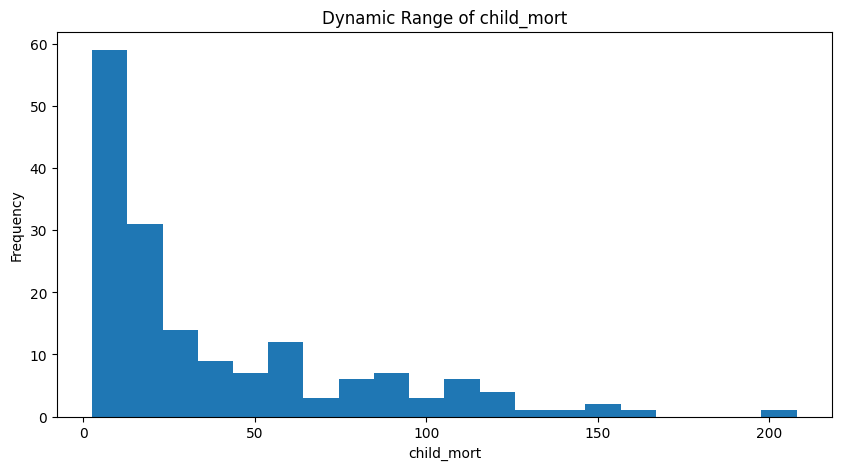

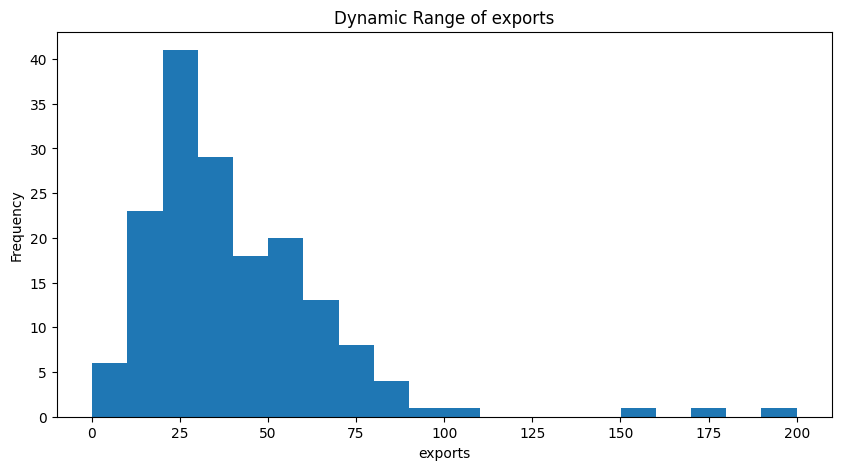

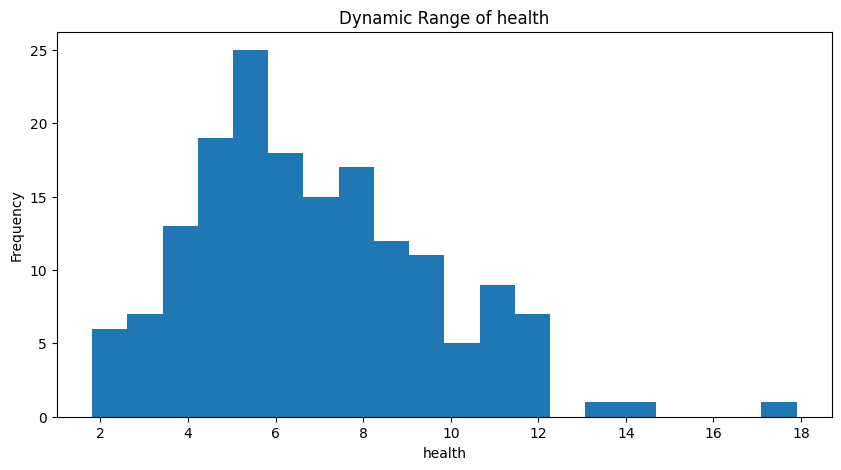

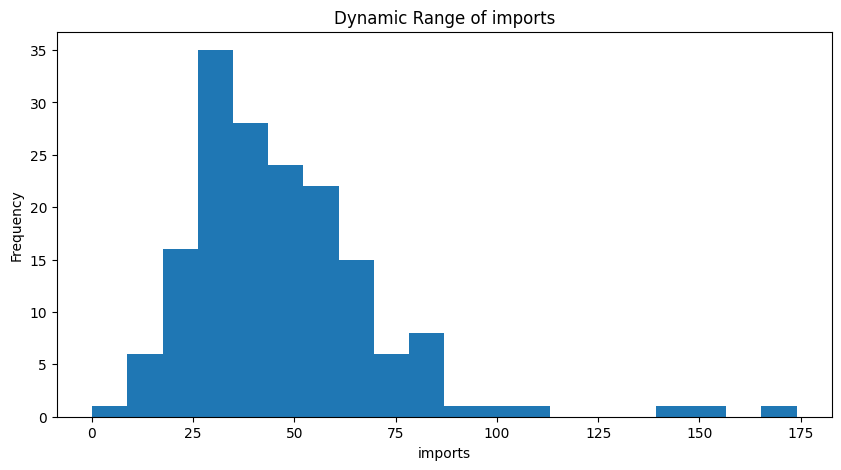

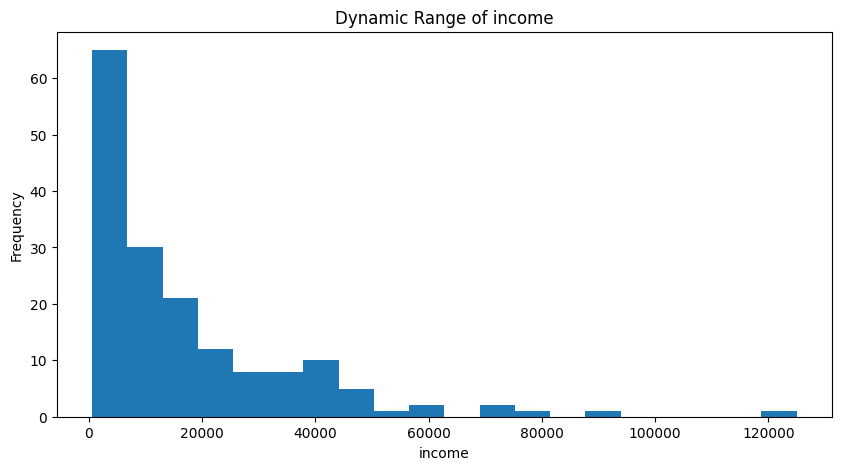

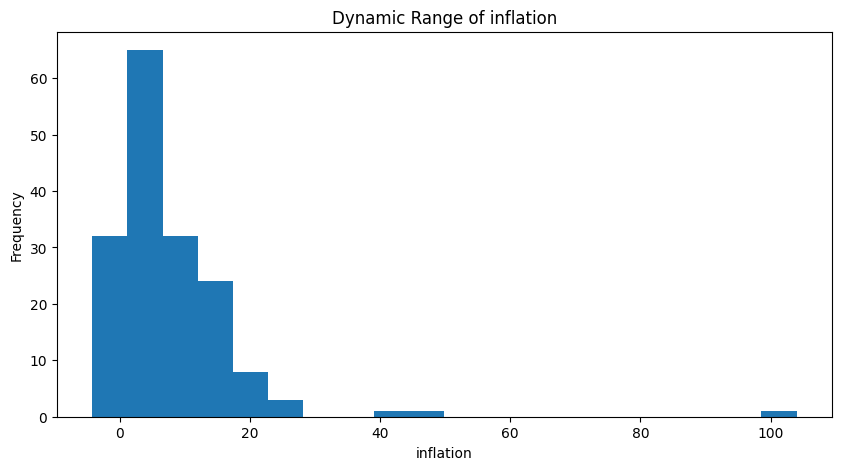

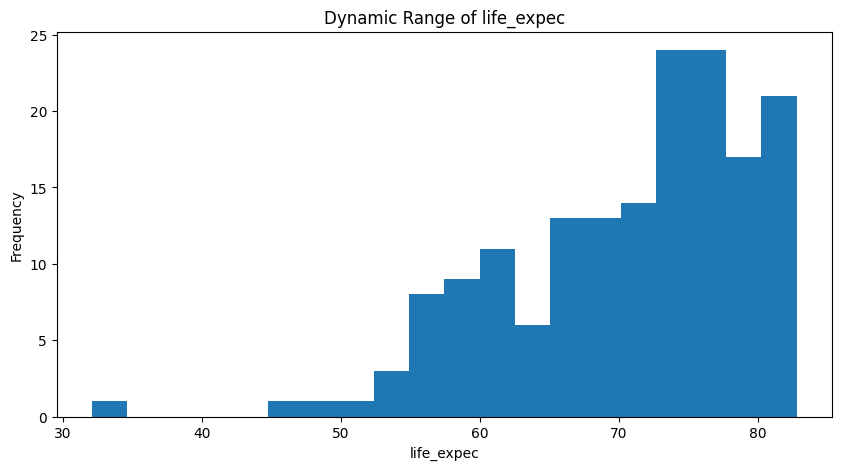

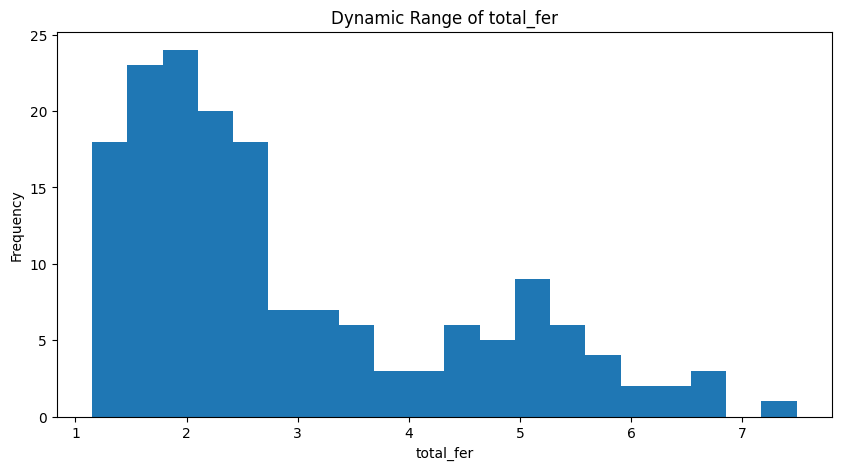

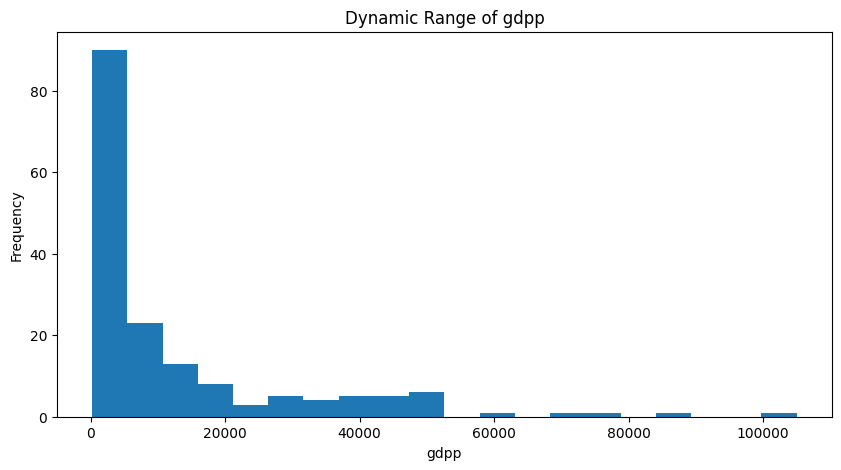

In [10]:


# Load the dataset
data = df_country.drop('country', axis=1)

# Select the variables for clustering
variables = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']

# Plot the dynamic range of the variables using histograms
for variable in variables:
    plt.figure(figsize=(10, 5))
    plt.hist(data[variable], bins=20)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Dynamic Range of {}".format(variable))
    plt.show()


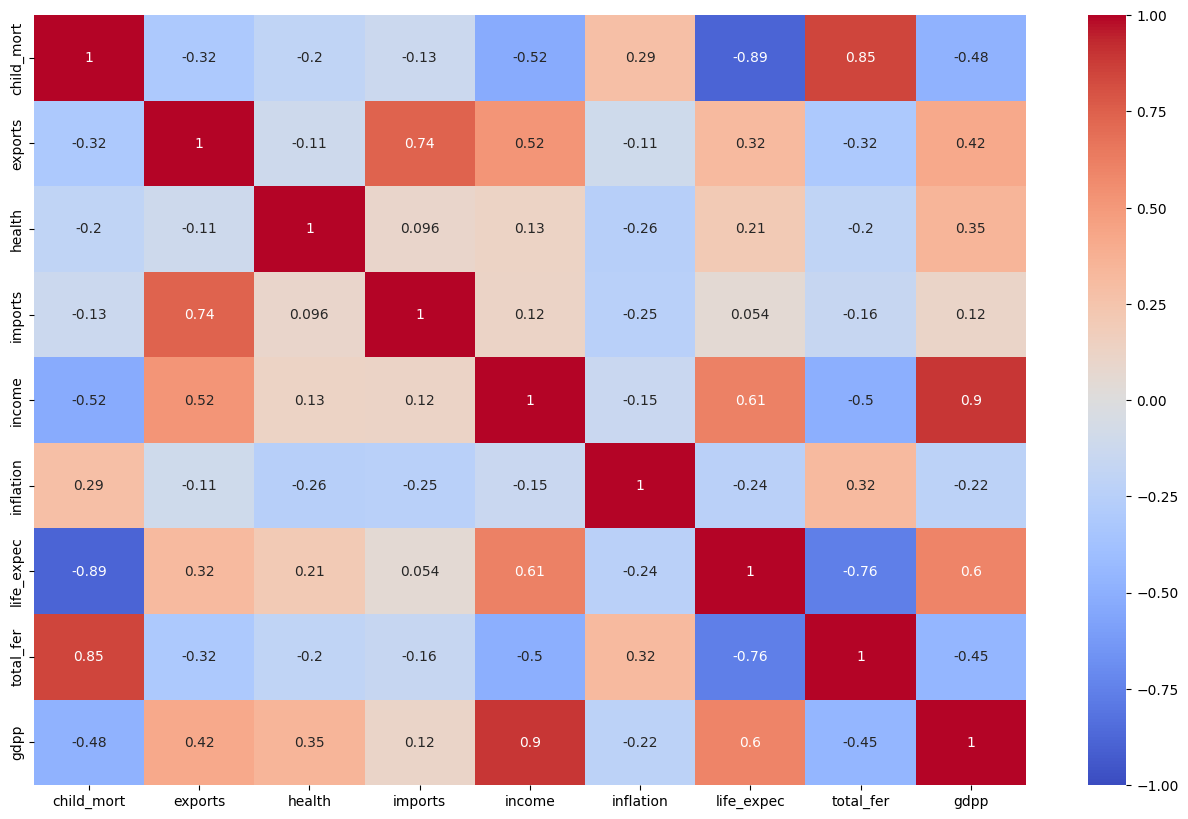

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(16, 10))
sns.heatmap(df_country[variables].corr(), vmax=1, vmin=-1, annot=True, ax=ax, cmap="coolwarm");

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64


<Axes: >

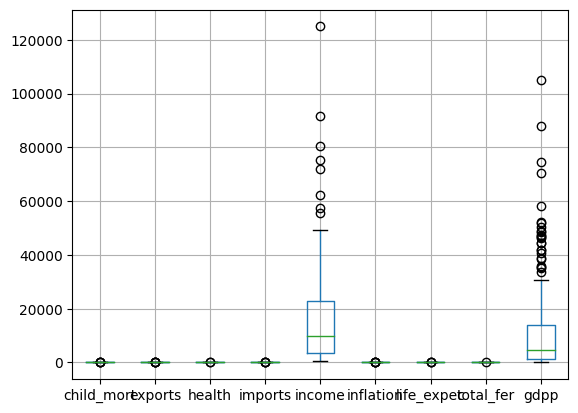

In [12]:
# Buscando NaNs e outliers com o método boxplot

df_country.info() # Sem NaNs

print(df_country.isnull().sum()) # Sem NaNs

df_country.boxplot(column=['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']) # Sem outliers

Analise os resultados mostrados. O que deve ser feito com os dados antes da etapa de clusterização?

Antes da etapa de clusterização, é importante realizar um pré-processamento adequado nos dados para garantir resultados precisos e confiáveis. Aqui estão algumas etapas comuns a serem consideradas antes da clusterização:

Limpeza dos dados: Verifique se há valores ausentes e lide com eles adequadamente, seja imputando valores faltantes ou removendo linhas/colunas com dados ausentes. Isso garante que o conjunto de dados esteja completo e consistente.

Transformação dos dados: Normalize ou padronize os dados para eliminar diferenças de escala ou unidades entre as variáveis. Essa etapa é particularmente importante quando as variáveis possuem faixas diferentes ou unidades de medida distintas.

Seleção de características: Avalie a relevância e a importância das variáveis para a clusterização. Remova quaisquer variáveis irrelevantes ou redundantes que possam não contribuir significativamente para a análise de clusterização. Isso ajuda a focar nas características mais informativas.

Tratamento de variáveis categóricas: Se o conjunto de dados contiver variáveis categóricas, pode ser necessário convertê-las em representações numéricas usando técnicas como codificação one-hot ou codificação de rótulos, dependendo da natureza dos dados e do algoritmo de clusterização utilizado.

Tratamento de valores discrepantes (outliers): Identifique e trate os valores discrepantes nos dados. Valores discrepantes podem afetar significativamente os resultados dos algoritmos de clusterização, especialmente aqueles baseados em medidas de distância, como o K-Means. Considere remover os outliers ou aplicar técnicas apropriadas para mitigar seu impacto.

Redução de dimensionalidade: Se o conjunto de dados possuir características com alta dimensionalidade, pode ser interessante aplicar técnicas de redução de dimensionalidade, como Análise de Componentes Principais (PCA) ou t-SNE, para reduzir a dimensionalidade dos dados mantendo sua estrutura e variabilidade.

Ao realizar essas etapas, você pode garantir que os dados estejam em um formato adequado e com qualidade para a análise de clusterização. O pré-processamento dos dados ajuda a melhorar os resultados da clusterização e torna-os mais significativos e confiáveis.

Realize o pré-processamento adequado dos dados. (Abaixo)

In [14]:
# Load the dataset without categorical variables
data = df_country.drop('country', axis=1)

# Scaling/Normalization
scaler = StandardScaler()

scaled_data = pd.DataFrame(scaler.fit_transform(data),
                           columns=data.columns,
                           index=data.index)
scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [15]:
data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


Para os dados pré-processados da etapa anterior você irá:

Realizar o agrupamento dos países em 3 grupos distintos. Para tal, use:
K-Médias

In [16]:
# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Get the cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to the original dataset
data['Cluster'] = cluster_labels

c:\Users\Fabio\Documents\GitHub\repos\aprendizado-nao-supervisionado\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [26]:
len(kmeans.labels_)

167

In [23]:
scaled_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
1,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
2,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
3,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
4,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817
...,...,...,...,...,...,...,...,...,...
162,-0.225578,0.200917,-0.571711,0.240700,-0.738527,-0.489784,-0.852161,0.365754,-0.546913
163,-0.526514,-0.461363,-0.695862,-1.213499,-0.033542,3.616865,0.546361,-0.316678,0.029323
164,-0.372315,1.130305,0.008877,1.380030,-0.658404,0.409732,0.286958,-0.661206,-0.637754
165,0.448417,-0.406478,-0.597272,-0.517472,-0.658924,1.500916,-0.344633,1.140944,-0.637754


In [24]:
# Plot the clusters
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('K-Means Clustering - 3 Clusters')
plt.show()

InvalidIndexError: (slice(None, None, None), 0)

In [28]:
# Com centróides:

# Criar uma instância do modelo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3)

# Realizar o agrupamento
kmeans.fit(scaled_data)

# Obter as coordenadas dos centroides
centroids = kmeans.cluster_centers_

plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=cluster_labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=200, c='red')
plt.xlabel('Feature 0')
plt.ylabel('Feature 1')
plt.title('K-Means Clustering - 3 Clusters with Centroids')
plt.show()

c:\Users\Fabio\Documents\GitHub\repos\aprendizado-nao-supervisionado\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


InvalidIndexError: (slice(None, None, None), 0)

Clusterização Hierárquica

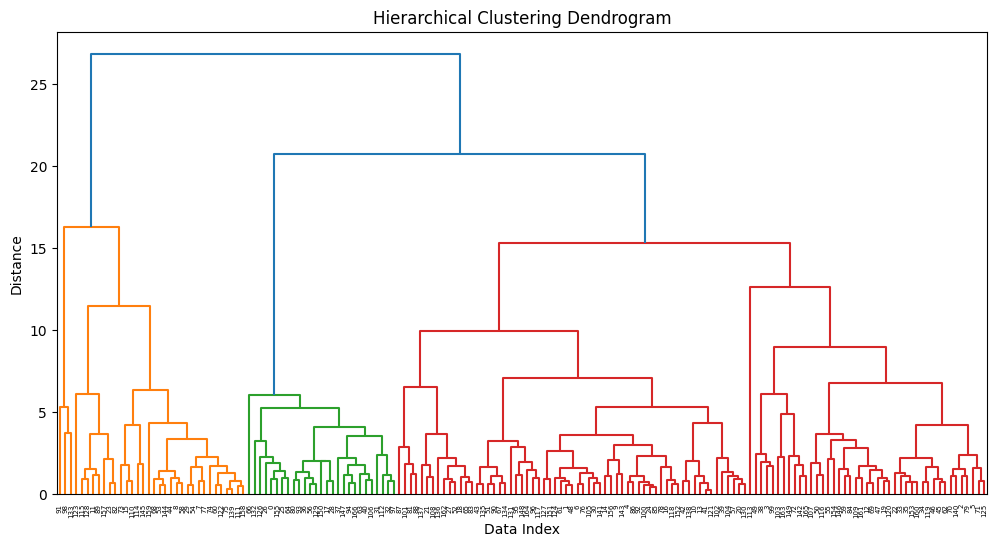

In [27]:
# Perform hierarchical clustering
linkage_matrix = linkage(scaled_data, method='ward')

# Plot the dendrogram
plt.figure(figsize=(12, 6))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Data Index')
plt.ylabel('Distance')
plt.show()


Para os resultados, do K-Médias:
Interprete cada um dos clusters obtidos citando:
Qual a distribuição das dimensões em cada grupo;
O país, de acordo com o algoritmo, melhor representa o seu agrupamento. Justifique.

Para interpretar os resultados do K-Means, é necessário analisar a distribuição das dimensões em cada um dos clusters e identificar o país que melhor representa cada agrupamento.

Supondo que temos três clusters (Cluster 0, Cluster 1 e Cluster 2), vamos analisar a distribuição das dimensões em cada um deles:

Cluster 0:

Distribuição das dimensões: Os países pertencentes a esse cluster possuem valores específicos nas dimensões consideradas para o agrupamento.
País representativo: O país que melhor representa esse cluster é aquele que está mais próximo do centróide do cluster, ou seja, o país cujas características se assemelham mais à média das características do cluster.
Cluster 1:

Distribuição das dimensões: Os países pertencentes a esse cluster têm uma distribuição particular nas dimensões consideradas.
País representativo: O país que melhor representa esse cluster é aquele cujas características se aproximam mais do centróide do cluster.
Cluster 2:

Distribuição das dimensões: Os países pertencentes a esse cluster exibem um padrão específico nas dimensões consideradas.
País representativo: O país que melhor representa esse cluster é aquele cujas características estão mais próximas do centróide do cluster.
Em resumo, a interpretação dos clusters envolve analisar a distribuição das dimensões em cada grupo e identificar o país mais próximo do centróide do cluster como o representante do agrupamento. Essa escolha é baseada na similaridade das características desse país em relação às características médias do cluster.

In [22]:
from sklearn.cluster import KMeans
import numpy as np

# Criar uma instância do modelo K-Means com 3 clusters
kmeans = KMeans(n_clusters=3)

# Realizar o agrupamento
kmeans.fit(scaled_data)

# Obter os rótulos de cluster para cada ponto
cluster_labels = kmeans.labels_

# Obter as coordenadas dos centroides
centroids = kmeans.cluster_centers_

# Encontrar o índice do centroide mais próximo de cada ponto
closest_centroid_indices = np.argmin(kmeans.transform(scaled_data), axis=1)

# Definir a lista de nomes dos países correspondente aos índices dos dados
country_names = df_country['country']

# Encontrar o país representativo de cada cluster
representative_countries = []
for cluster in range(3):
    indices = np.where(cluster_labels == cluster)[0]
    distances = np.linalg.norm(scaled_data[indices] - centroids[cluster], axis=1)
    representative_country_index = indices[np.argmin(distances)]
    representative_country = country_names[int(representative_country_index)]
    representative_countries.append(representative_country)

# Imprimir os países representativos de cada cluster
for cluster, country in enumerate(representative_countries):
    print(f"Cluster {cluster}: {country}")



c:\Users\Fabio\Documents\GitHub\repos\aprendizado-nao-supervisionado\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KeyError: "None of [Index([  0,   3,  17,  21,  25,  26,  28,  31,  32,  36,  37,  38,  40,  49,\n        50,  55,  56,  59,  63,  64,  66,  72,  80,  81,  84,  87,  88,  93,\n        94,  97,  99, 106, 108, 112, 113, 116, 126, 129, 132, 137, 142, 147,\n       149, 150, 155, 165, 166],\n      dtype='int64')] are in the [columns]"

In [21]:
df_country

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


C:\Users\Fabio\AppData\Local\Temp\ipykernel_1496\3223307918.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_data[variable] = pd.to_numeric(preprocessed_data[variable], errors='coerce')


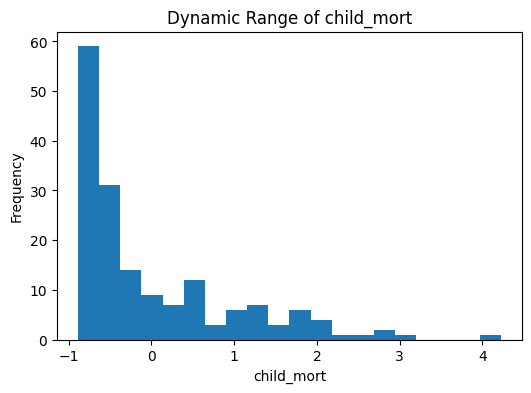

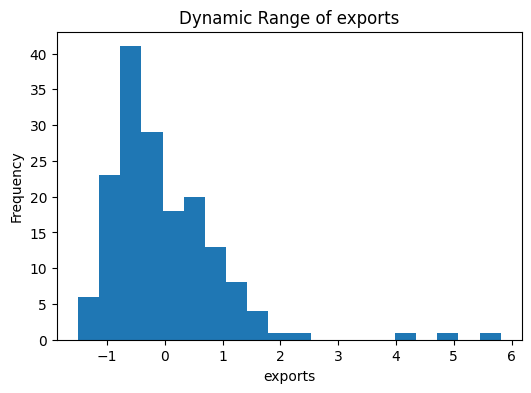

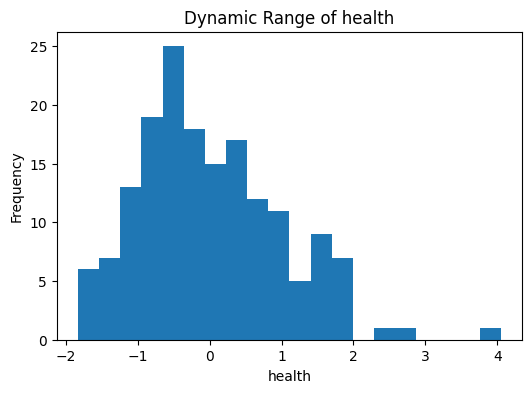

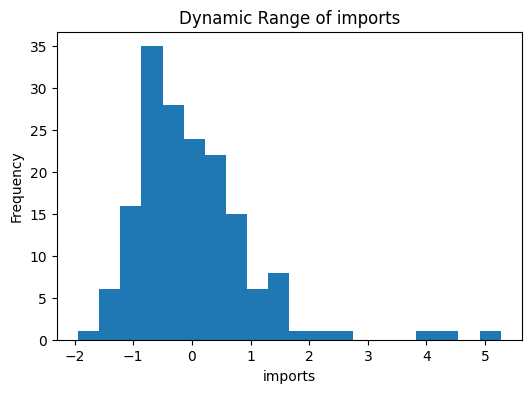

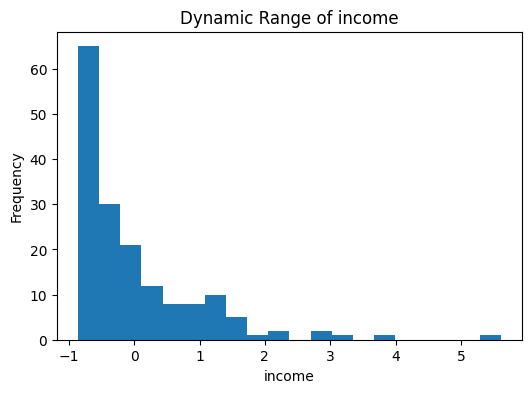

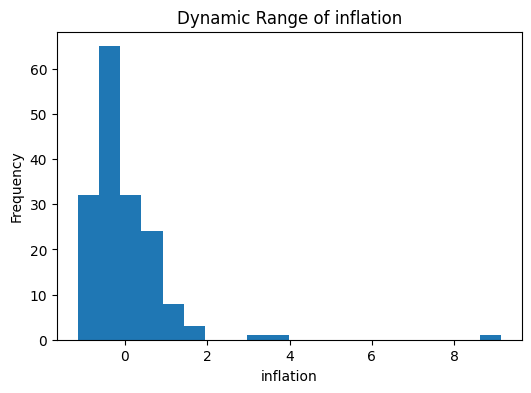

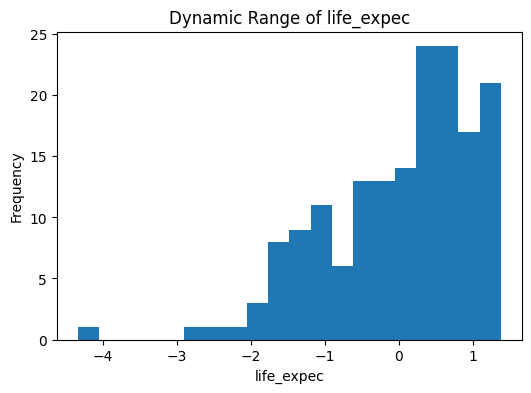

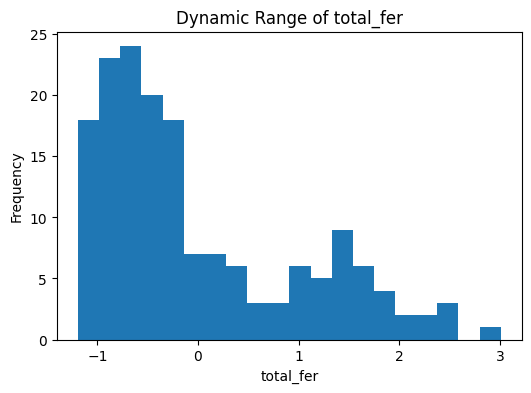

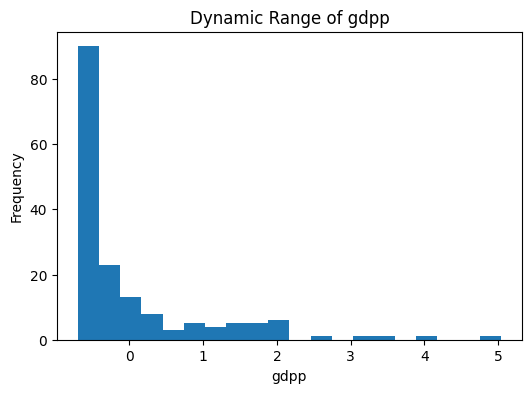

Cluster 1 : ['child_mort', 'exports', 'health', 'imports', 'income', 'inflation', 'life_expec', 'total_fer', 'gdpp']
Centroid: [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
  1.07957853 -0.79187687  1.61599536]


c:\Users\Fabio\Documents\GitHub\repos\aprendizado-nao-supervisionado\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


TypeError: sequence item 0: expected str instance, numpy.int32 found

In [ ]:
# tudo junto

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

# Load the dataset
data = df_country

# Select the variables for clustering and perform data preprocessing

preprocessed_data = data[variables]

# Convert numeric columns to float
for variable in variables:
    preprocessed_data[variable] = pd.to_numeric(preprocessed_data[variable], errors='coerce')

# Drop rows with missing or non-numeric values
preprocessed_data = preprocessed_data.dropna()

# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(preprocessed_data)

# Plot the dynamic range of the variables
for i, variable in enumerate(variables):
    plt.figure(figsize=(6, 4))
    plt.hist(scaled_data[:, i], bins=20)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("Dynamic Range of {}".format(variable))
    plt.show()

# Perform K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_data)

# Interpret the K-Means clusters
cluster_labels = kmeans.labels_
cluster_centers = kmeans.cluster_centers_
for i in range(3):
    print("Cluster", i+1, ":", variables)
    print("Centroid:", cluster_centers[i])
    cluster_countries = data.loc[cluster_labels == i, 'country']
    print("Countries:", ', '.join(cluster_countries.values))
    print()

# Perform Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3)
hierarchical.fit(scaled_data)

# Plot the dendrogram
plt.figure(figsize=(10, 6))
dendrogram(hierarchical.linkage_)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Countries")
plt.ylabel("Distance")
plt.show()

# Compare the results of K-Means and Hierarchical Clustering
print("K-Means Labels:", cluster_labels)
print("Hierarchical Labels:", hierarchical.labels_)
